https://towardsdatascience.com/optical-character-recognition-ocr-with-less-than-12-lines-of-code-using-python-48404218cccb
- 설치


1. Tesseract OCR engine 별도 설치 : https://tesseract-ocr.github.io/tessdoc/Compiling.html#macos
(Install Dependencies, Compile)
2. 

```
$ brew install tesseract
$ pip install pytesseract
```
- Pytesseract is a wrapper for Tesseract-OCR Engine. 

3. 언어중에서 영어 패키지만 디폴트로 다운로드된 것 확인 <br> 
4.깃허브에서 메뉴얼로 언어 패키지를 다운로드 받기:  <br>
    - https://github.com/tesseract-ocr/tessdata 에서 kor.traineddata 파일을 다운받은뒤, /usr/local/share/tessdata 여기로 복사한다.
    
5.TESSDATA_PREFIX환경을 기존 언어패키지가 저장된 디렉토리로 지정<br>
   $ export TESSDATA_PREFIX=/usr/local/share/tessdata  


6.
```
$ tesseract images/test_kor.png stdout -l kor 실행시 터미널에 한글이 인식되서 출력된다. 
$ tesseract [경로포함 파일명] stdout -l kor
```

#### 버전 확인

In [ ]:
!python --version

Python 3.8.5


In [ ]:
pytesseract.get_tesseract_version()

LooseVersion ('4.1.1')

Tesseract Engine v5.0.0 <br>
<img width=70% src='./참조/Tesseract_Engine_ver.png'>

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
try:
    import Image
except ImportError:
    from PIL import Image
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# If you don't have tesseract executable in your PATH, include the following:
# to know about your path, please execute $ brew list [pkg-name] e.g. brew list tesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'

In [ ]:
img = cv2.imread('./참조/test_kor.png')
# converting to binary img
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)

#### converting to binary 전,후 value

In [ ]:
# RGB value를 다 포함하고 있다.
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# GrayScale을 통해서 0또는 255로 value가 변환.
np.unique(gray)

array([  0, 255], dtype=uint8)

#### preprocessing

In [ ]:
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)

#### 영어, 한글 패키지 설치 확인

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'

In [ ]:
print(pytesseract.get_languages(config=''))

['eng', 'osd', 'snum']


#### 인식할 이미지

<img src='./참조/test_kor.png'>

#### 이미지 인식후 text 결과 - opencv로 로드시

In [ ]:
out_below = pytesseract.image_to_string(img, lang='kor')
print(out_below)

 

한 글 문 자 데 이 터 베 이 스 마 1008 구 축
이0 발 며이 아 0 벼 아 이 불 허다 열 5 나 게 00

대 느 베제 이
으 100010

  

다 아 훌 기 바 블아 시어 아 아1 방 겨 ( 베 아 겔 : 벌 제 [ 오 이 이제 어
다기 중 아 아 아 나 아이 아 나 이 사 오 애 기제 베이 잘이 아 2이 강 가 겐이

~ ㅡ 227222
미 0 014 녀 투 아 이 니 라 0 디 이 트우 할 나이
0806004034662 알 우 아 니 발이 에 나 헬 가 사 느 나 비 네 니 시 하 아이 발 대
0 1250 나 비이 거 비 이 니 이 애 자 게 이시
[120946029660 녀 바 에 구 서 비 ( 하 다1 디 으 아 블아
000 61 내 보 리 니 이발 168 주 이이
050066 306 보 부 019610 사 이흘다 흘 바 애 바 흘부 너며아 이 헤 나
02006 망 항 101 비 라 가 9브 비 0 녀 니 이 6 자 부 나 셔 히 녀 니 니 해 하
000110002004401(06036 자 주나

 

 

[ 이 내 이툴

             

 
    

     

       

        

 
 

 
 

 

 

 

2 0 녀 여 해 부아 나

 



In [ ]:
out_below

' \n\n한 글 문 자 데 이 터 베 이 스 마 1008 구 축\n이0 발 며이 아 0 벼 아 이 불 허다 열 5 나 게 00\n\n대 느 베제 이\n으 100010\n\n  \n\n다 아 훌 기 바 블아 시어 아 아1 방 겨 ( 베 아 겔 : 벌 제 [ 오 이 이제 어\n다기 중 아 아 아 나 아이 아 나 이 사 오 애 기제 베이 잘이 아 2이 강 가 겐이\n\n~ ㅡ 227222\n미 0 014 녀 투 아 이 니 라 0 디 이 트우 할 나이\n0806004034662 알 우 아 니 발이 에 나 헬 가 사 느 나 비 네 니 시 하 아이 발 대\n0 1250 나 비이 거 비 이 니 이 애 자 게 이시\n[120946029660 녀 바 에 구 서 비 ( 하 다1 디 으 아 블아\n000 61 내 보 리 니 이발 168 주 이이\n050066 306 보 부 019610 사 이흘다 흘 바 애 바 흘부 너며아 이 헤 나\n02006 망 항 101 비 라 가 9브 비 0 녀 니 이 6 자 부 나 셔 히 녀 니 니 해 하\n000110002004401(06036 자 주나\n\n \n\n \n\n[ 이 내 이툴\n\n             \n\n \n    \n\n     \n\n       \n\n        \n\n \n \n\n \n \n\n \n\n \n\n \n\n2 0 녀 여 해 부아 나\n\n \n\x0c'

#### 이미지 인식후 text 결과 - PIL로 로드시
- 동일한 사진인데도 PIL패키지로 로드해서 OCR 인식을 했을때 인식률이 높다.

In [ ]:
pytesseract.image_to_string(Image.open('./참조/test_kor.png'), lang='kor+eng')
# 한글, 영어 둘다 인식 셋업

' \n\n한 글 문 자 데 이 터 베 이 스 마 1008 구 축\n\nConstruction of Printed Hangul Character Database PHDO8\n\n함 대 성 , 이 득 용 , 정 인 숙 , 오 일 석\n전 북 대 학 교 전 자 정 보 공 학 부 컴 퓨 터 공 학\n\nDae-Sung Ham(ham890@chonbuk.ac,kr), Duk-Ryong Lee(dr_lee@chonbuk.ac.kr),\nInSuk_ Jung(msisjung@honbuk.ac.kr), lI-Seok Oh(isoh@chonbuk, ac. kr)\n\n문 자 인 식 의 응 용 이 형 식 문 서 의 인 식 같 은 고 전 적 인 BIS Woy FLAY Aa Bas] BA 인 식 으\n로 확 장 되 고 있 다 . 이 러 한 새 로 운 응 용 에 서는 밍 조 나 고 딕 같 은 표 준 글 꼴 뿐 만 아 니 라 다 양 한 모 양 의\n을 사 용 하 는 것 이 보 편 적 이 다 . 기 존 의 데 이 터 베 이 스 들 은 주 로 표 대 상 으 로 제 작 되 어 새 로 운 응\n용 에 사 용 하 는 데 한 계 를 안 고 있 다 . 본 논 문 에 서는 완 성형 2350 자 각 각 을 대 상 으 로 9 종 류 의 글 꼴 에 대 해\n크 기 , 품 짐 , 해 상 도 를 달 리 하 여 243 개 의 이 미 지 샘 플 을 생 성 하 였 다 . 또 한 이 들 샘 플 각 각 에 대 해 이 진\nVAAL 회 전 각 도 를 달 리 하 여 변 형된 샘 플 을 얻 었 다 . 이 러 한 과 정 으 로 마 다 2.187 개 의 생 플 을\n생 성 하 였 으 며 , F519 AA AES 구 축 하 였 다 . 데 이 터 베 이 스 에 대\n한 특 성과 상 용 08 소 프 트 웨 어 에 대 한 인 식\n\n \n\n      \n     \n \n\n \n\n   \n \n \n\n \n\n \n\n \n\n0 중 심 어 : ! 문 자 인 식 ! 한 글 인 식 ! 데 이 터 베 이 스 ! 인 새 체 !

In [ ]:
print(pytesseract.image_to_data(Image.open('./참조/test_kor.png'), lang='kor+eng'))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	574	395	-1	
2	1	1	0	0	0	10	14	546	5	-1	
3	1	1	1	0	0	10	14	546	5	-1	
4	1	1	1	1	0	10	14	546	5	-1	
5	1	1	1	1	1	10	14	546	5	95	 
2	1	2	0	0	0	132	32	302	19	-1	
3	1	2	1	0	0	132	32	302	19	-1	
4	1	2	1	1	0	132	32	302	19	-1	
5	1	2	1	1	1	132	33	34	18	93	한
5	1	2	1	1	2	152	28	9	33	93	글
5	1	2	1	1	3	174	33	35	18	93	문
5	1	2	1	1	4	191	28	14	33	93	자
5	1	2	1	1	5	218	33	24	18	93	데
5	1	2	1	1	6	247	33	13	18	93	이
5	1	2	1	1	7	269	33	10	18	93	터
5	1	2	1	1	8	286	34	10	14	93	베
5	1	2	1	1	9	298	33	20	18	92	이
5	1	2	1	1	10	309	28	17	33	93	스
5	1	2	1	1	11	340	34	12	15	83	마
5	1	2	1	1	12	346	34	44	16	92	1008
5	1	2	1	1	13	399	32	29	19	90	구
5	1	2	1	1	14	416	28	22	33	96	축
2	1	3	0	0	0	82	61	401	13	-1	
3	1	3	1	0	0	82	61	401	13	-1	
4	1	3	1	1	0	82	61	401	13	-1	
5	1	3	1	1	1	82	61	84	11	93	Construction
5	1	3	1	1	2	173	61	12	11	96	of
5	1	3	1	1	3	193	61	46	11	93	Printed
5	1	3	1	1	4	247	61	44	13	90	Hangul
5	1	3	1	1	5	298	61	66	11	96	Ch

#### confidence score 확인

In [ ]:
output = pytesseract.image_to_data(img, lang='kor+eng', output_type=Output.DICT)
output

{'level': [1,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5],
 'page_num': [1,
  1,
  1,
  1

In [ ]:
output.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

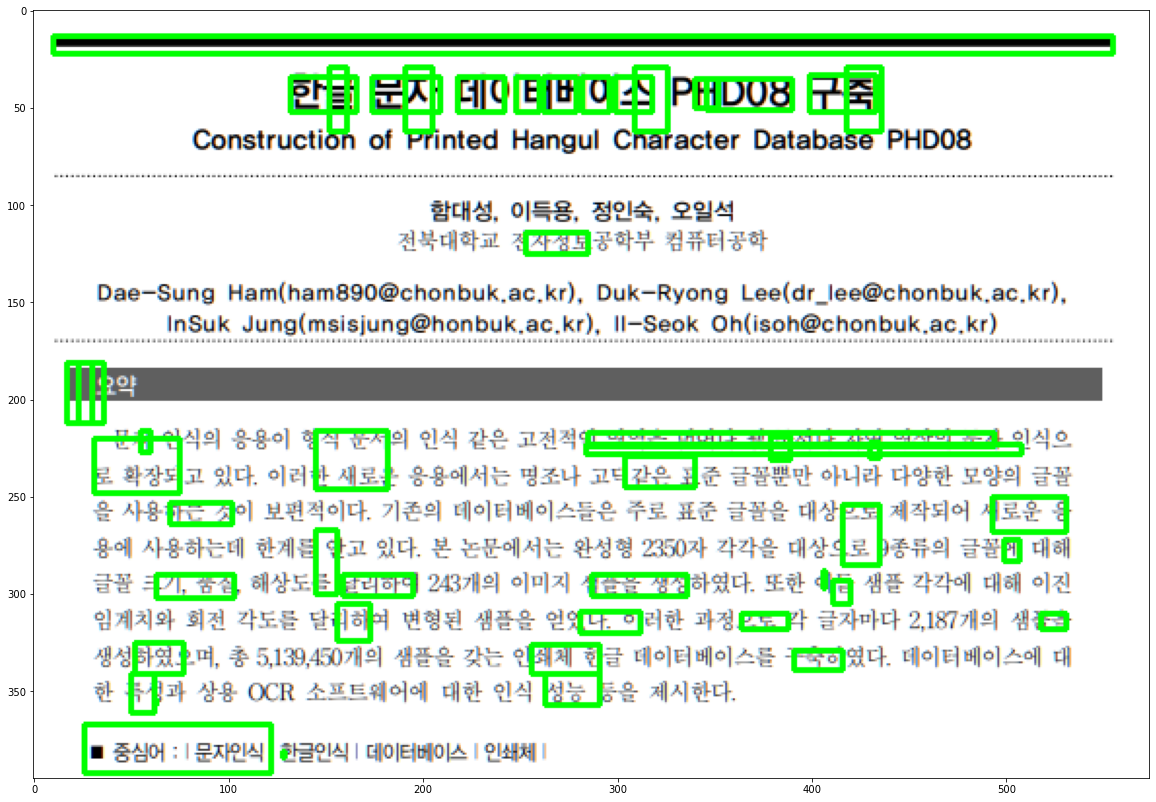

In [ ]:
# opencv로 로드한 경우
img = cv2.imread('./참조/test_kor.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

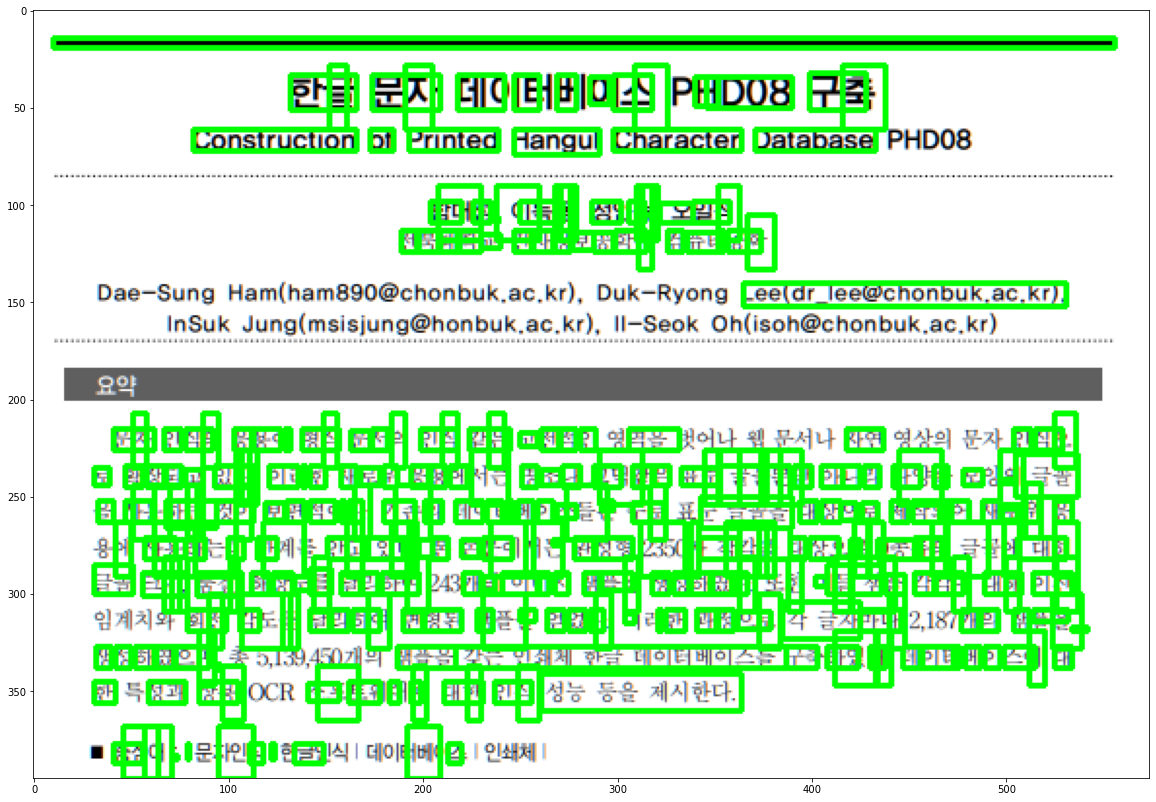

In [ ]:
# PIL로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/test_kor.png'), lang='kor+eng', output_type=Output.DICT)
img = cv2.imread('./참조/test_kor.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
df =pd.DataFrame(output)
df

level  page_num  block_num  par_num  line_num  word_num  left  top  \
0        1         1          0        0         0         0     0    0   
1        2         1          1        0         0         0    10   14   
2        3         1          1        1         0         0    10   14   
3        4         1          1        1         1         0    10   14   
4        5         1          1        1         1         1    10   14   
..     ...       ...        ...      ...       ...       ...   ...  ...   
422      5         1         14        1         1        23   224  368   
423      5         1         14        1         1        24   227  377   
424      5         1         14        1         1        25   239  377   
425      5         1         14        1         1        26   252  368   
426      5         1         14        1         1        27   262  377   

     width  height conf text  
0      574     395   -1       
1      546       5   -1       
2      546       5   -1       
3      546       5   -1       
4      546       5   95       
..     ...     ...  ...  ...  
422      4      27   44    !  
423     14      10   44    인  
424     18      10   11    새  
425      8      27   51    체  
426      2       8   21    !  

[427 rows x 12 columns]

In [ ]:
df[df['conf'] > 0]

level  page_num  block_num  par_num  line_num  word_num  left  top  \
4        5         1          1        1         1         1    10   14   
8        5         1          2        1         1         1   132   33   
9        5         1          2        1         1         2   152   28   
10       5         1          2        1         1         3   174   33   
11       5         1          2        1         1         4   191   28   
..     ...       ...        ...      ...       ...       ...   ...  ...   
422      5         1         14        1         1        23   224  368   
423      5         1         14        1         1        24   227  377   
424      5         1         14        1         1        25   239  377   
425      5         1         14        1         1        26   252  368   
426      5         1         14        1         1        27   262  377   

     width  height  conf text  
4      546       5    95       
8       34      18    93    한  
9        9      33    93    글  
10      35      18    93    문  
11      14      33    93    자  
..     ...     ...   ...  ...  
422      4      27    44    !  
423     14      10    44    인  
424     18      10    11    새  
425      8      27    51    체  
426      2       8    21    !  

[369 rows x 12 columns]

In [ ]:
# block_num은 문서가 위에서부터 아래로 내려옴에 따른 위치와 유사하다.
print(np.array(df[df['block_num'] == 5]['text'].index))

[68 69 70 71 72 73 74 75 76 77 78 79 80 81]


In [ ]:
# block_num의 최빈값인 6은 어떤 글자를 포함하고 있는지
print(np.array(df[df['block_num'] == 6]['text']))
print(np.array(df[df['block_num'] == 6]['text'].index))

['' '' '' '문' '자' '인' '식' '의' '응' '용' '이' '형' '식' '문' '서' '의' '인' '식' '같'
 '은' '고' '전' '적' '인' 'BIS' 'Woy' 'FLAY' 'Aa' 'Bas]' 'BA' '인' '식' '으' ''
 '로' '확' '장' '되' '고' '있' '다' '.' '이' '러' '한' '새' '로' '운' '응' '용' '에' '서는'
 '밍' '조' '나' '고' '딕' '같' '은' '표' '준' '글' '꼴' '뿐' '만' '아' '니' '라' '다' '양'
 '한' '모' '양' '의' '' '을' '사' '용' '하' '는' '것' '이' '보' '편' '적' '이' '다' '.'
 '기' '존' '의' '데' '이' '터' '베' '이' '스' '들' '은' '주' '로' '표' '대' '상' '으' '로'
 '제' '작' '되' '어' '새' '로' '운' '응' '' '용' '에' '사' '용' '하' '는' '데' '한' '계'
 '를' '안' '고' '있' '다' '.' '본' '논' '문' '에' '서는' '완' '성형' '2350' '자' '각' '각'
 '을' '대' '상' '으' '로' '9' '종' '류' '의' '글' '꼴' '에' '대' '해' '' '크' '기' ','
 '품' '짐' ',' '해' '상' '도' '를' '달' '리' '하' '여' '243' '개' '의' '이' '미' '지' '샘'
 '플' '을' '생' '성' '하' '였' '다' '.' '또' '한' '이' '들' '샘' '플' '각' '각' '에' '대'
 '해' '이' '진' '' 'VAAL' '회' '전' '각' '도' '를' '달' '리' '하' '여' '변' '형된' '샘'
 '플' '을' '얻' '었' '다' '.' '이' '러' '한' '과' '정' '으' '로' '마' '다' '2.187' '개'
 '의' '생' '플' '을' '' '생' '성' '하' '였' '으' '며' ',' 'F5

In [ ]:
# line_num 최빈값 1의 텍스트들이 모두 문서의 초반부에 머물러서 line_num=1인것은 아니다.
print(np.array(df[df['line_num'] == 1]['text']))
print(np.array(df[df['line_num'] == 1]['text'].index))

['' ' ' '' '한' '글' '문' '자' '데' '이' '터' '베' '이' '스' '마' '1008' '구' '축' ''
 'Construction' 'of' 'Printed' 'Hangul' 'Character' 'Database' 'PHDO8' ''
 '함' '대' '성' ',' '이' '득' '용' ',' '정' '인' '숙' ',' '오' '일' '석' '' 'Dae-Sung'
 'Ham(ham890@chonbuk.ac,kr),' 'Duk-Ryong' 'Lee(dr_lee@chonbuk.ac.kr),' ''
 '문' '자' '인' '식' '의' '응' '용' '이' '형' '식' '문' '서' '의' '인' '식' '같' '은' '고'
 '전' '적' '인' 'BIS' 'Woy' 'FLAY' 'Aa' 'Bas]' 'BA' '인' '식' '으' '' ' ' '' ' '
 '    ' '' ' ' '' ' ' ' ' '' ' ' '' ' ' '' ' ' '' '0' '중' '심' '어' ':' '!'
 '문' '자' '인' '식' '!' '한' '글' '인' '식' '!' '데' '이' '터' '베' '이' '스' '!' '인'
 '새' '체' '!']
[  3   4   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  24
  25  26  27  28  29  30  31  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  70  71  72  73  74  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 359 360 363 364 365 374 375 378 379 380 387 388 391
 392 395 396 399 400 401 402 4

In [ ]:
# word_num=0은 모두 빈칸을 의미, 단어의 class를 word_num으로 encoding한 것으로 추측.
# 그러나 word_num 1부터는 어떤 글자의 특징(e.g.영어, 따옴표, 기호)별로 모여진거 같진 않다.
print(np.array(df[df['word_num'] == 0]['text']))

['' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '']


In [ ]:
for each in df.columns:
    print(df[each].value_counts())

5    371
4     27
3     14
2     14
1      1
Name: level, dtype: int64
1    427
Name: page_num, dtype: int64
6     275
4      36
14     30
2      17
5      14
8      11
3      10
10      9
13      4
12      4
11      4
9       4
7       4
1       4
0       1
Name: block_num, dtype: int64
1    412
0     15
Name: par_num, dtype: int64
1    121
2     72
3     44
5     43
4     41
6     35
0     29
7     25
8     17
Name: line_num, dtype: int64
0     56
1     27
2     18
3     16
4     15
5     14
6     14
7     13
11    12
14    12
13    12
12    12
9     12
10    12
8     12
15    11
16    10
17     9
20     8
18     8
19     8
21     8
23     8
24     8
22     8
25     7
26     7
27     7
30     6
28     6
29     6
33     5
34     5
31     5
32     5
35     4
36     4
37     4
38     4
39     4
40     3
41     1
42     1
Name: word_num, dtype: int64
31     14
142     7
33      6
261     6
68      5
       ..
281     1
278     1
277     1
275     1
0       1
Name: left, Length: 272, dtyp

<AxesSubplot:xlabel='level', ylabel='Count'>

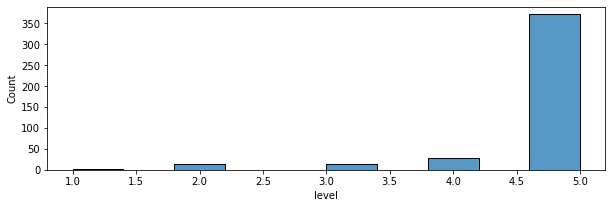

In [ ]:
df['level'] = df['level'].astype(int)
plt.figure(figsize=(10,3))
sns.histplot(df[df['level'] > 0]['level'])

In [ ]:
# 레벨이 1~4사이일 경우는 총 56개의 letter가 있다.
len(df[df['level'] < 5])

56

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conf'>

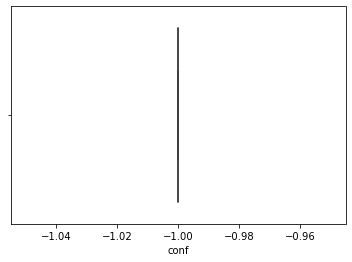

In [ ]:
# 레벨이 1~4사이일 경우에는 confidence score는 모두 음수에 머물렀다.
sns.boxplot(df[df['level'] < 5]['conf'])

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conf'>

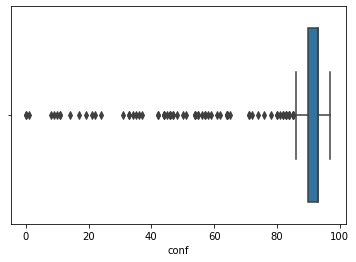

In [ ]:
# 레벨이 5일 경우에는 confidence score는 모두 0이상이긴 했다.
sns.boxplot(df[df['level'] == 5]['conf'])

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conf'>

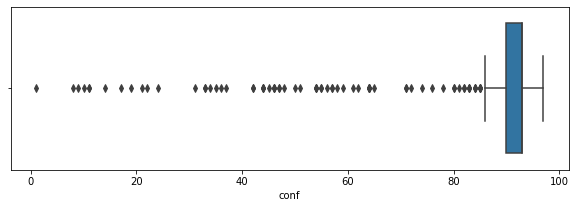

In [ ]:
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.boxplot(df[df['conf'] > 0]['conf'])

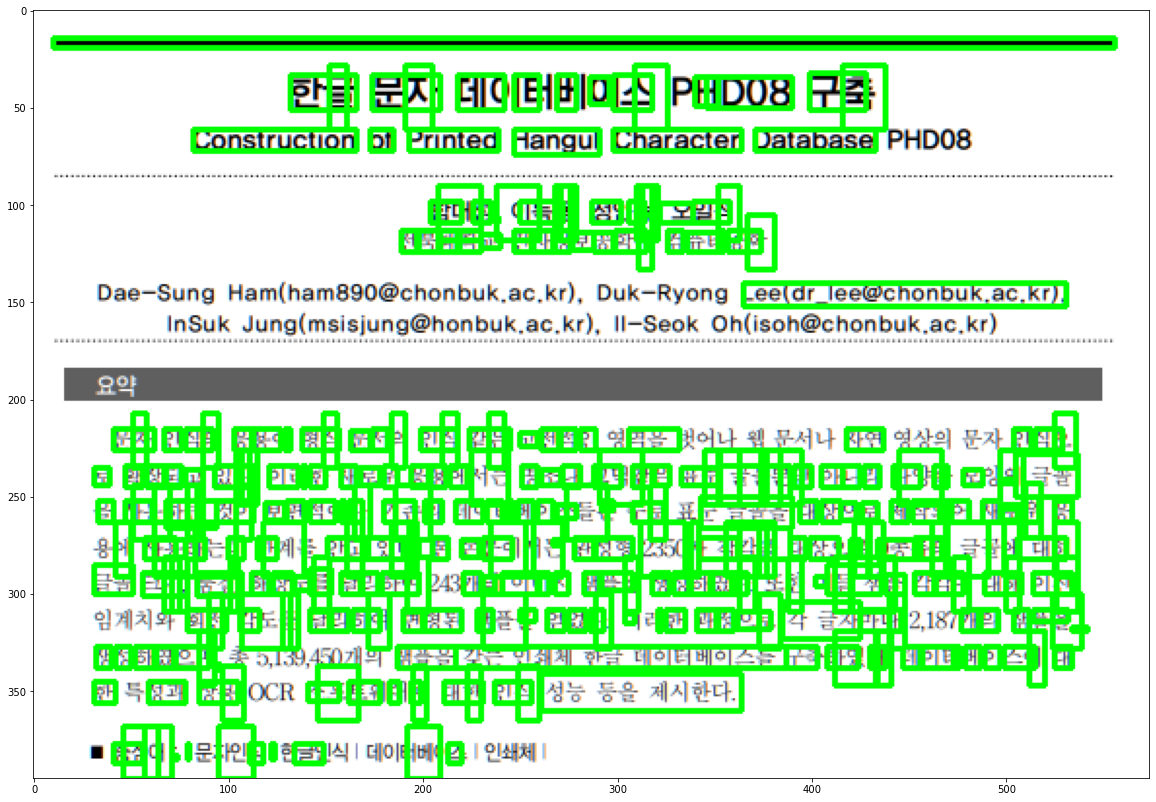

In [ ]:
# confidence score를 60이상으로 했을때의 bounding box
output = pytesseract.image_to_data(Image.open('./참조/test_kor.png'), lang='kor+eng', output_type=Output.DICT)
img = cv2.imread('./참조/test_kor.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

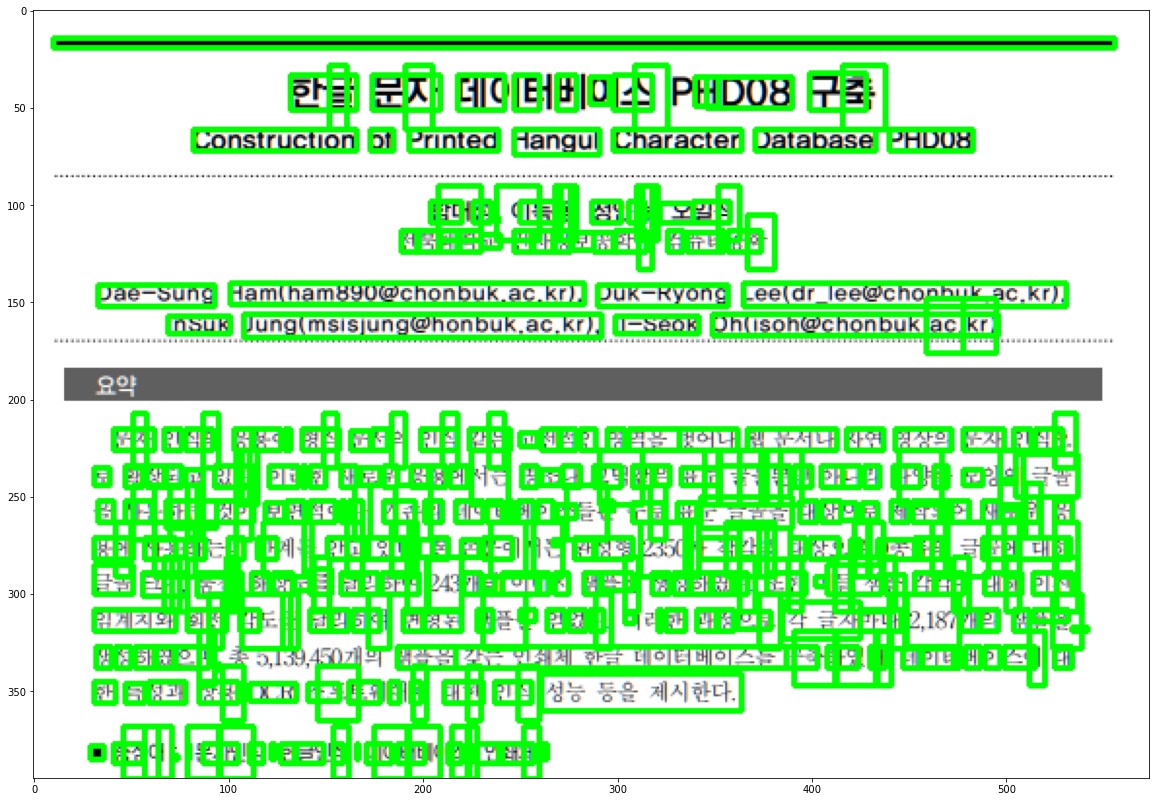

In [ ]:
# confidence score를 낮춰서 보면, 더 많은 bounding box를 인식했음을 알 수 있다.
output = pytesseract.image_to_data(Image.open('./참조/test_kor.png'), lang='kor+eng', output_type=Output.DICT)
img = cv2.imread('./참조/test_kor.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 0:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
np.array(df[df['conf'] > 0]['text'])

array([' ', '한', '글', '문', '자', '데', '이', '터', '베', '이', '스', '마', '1008',
       '구', '축', 'Construction', 'of', 'Printed', 'Hangul', 'Character',
       'Database', 'PHDO8', '함', '대', '성', ',', '이', '득', '용', ',', '정',
       '인', '숙', ',', '오', '일', '석', '전', '북', '대', '학', '교', '전', '자',
       '정', '보', '공', '학', '부', '컴', '퓨', '터', '공', '학', 'Dae-Sung',
       'Ham(ham890@chonbuk.ac,kr),', 'Duk-Ryong',
       'Lee(dr_lee@chonbuk.ac.kr),', 'InSuk_',
       'Jung(msisjung@honbuk.ac.kr),', 'lI-Seok', 'Oh(isoh@chonbuk,',
       'ac.', 'kr)', '문', '자', '인', '식', '의', '응', '용', '이', '형', '식',
       '문', '서', '의', '인', '식', '같', '은', '고', '전', '적', '인', 'BIS',
       'Woy', 'FLAY', 'Aa', 'Bas]', 'BA', '인', '식', '으', '로', '확', '장',
       '되', '고', '있', '다', '.', '이', '러', '한', '새', '로', '운', '응', '용',
       '에', '서는', '밍', '조', '나', '고', '딕', '같', '은', '표', '준', '글', '꼴',
       '뿐', '만', '아', '니', '라', '다', '양', '한', '모', '양', '의', '을', '사',
       '용', '하', '는', '것', '이', '보', '편', 

In [ ]:
[df['text']=='마']

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 422    False
 423    False
 424    False
 425    False
 426    False
 Name: text, Length: 427, dtype: bool]

In [ ]:
df[df['conf'] > 0][df[df['conf'] > 0]['text']=='마']

level  page_num  block_num  par_num  line_num  word_num  left  top  \
18       5         1          2        1         1        11   340   34   
307      5         1          6        1         6        27   425  308   

     width  height  conf text  
18      12      15    83    마  
307     21      11    64    마

# train을 위한 라벨링 작업
1. 자바 다운로드
https://www.java.com/en/download/

2. 자바를 터미널에서 실행하기 위해서 필요한 Java SE Development Kit 16 (JDK)
https://www.oracle.com/java/technologies/javase-jdk16-downloads.html

3. jTessBoxEditor 다운로드 - not the FX ones
https://sourceforge.net/projects/vietocr/files/jTessBoxEditor/

4. 터미널에서 jTessBoxEditor.jar 가 설치된 디렉토리로 이동한뒤에 아래 커맨드 실행 <br>
$ java -Xms4096m -Xmx4096m -jar jTessBoxEditor.jar

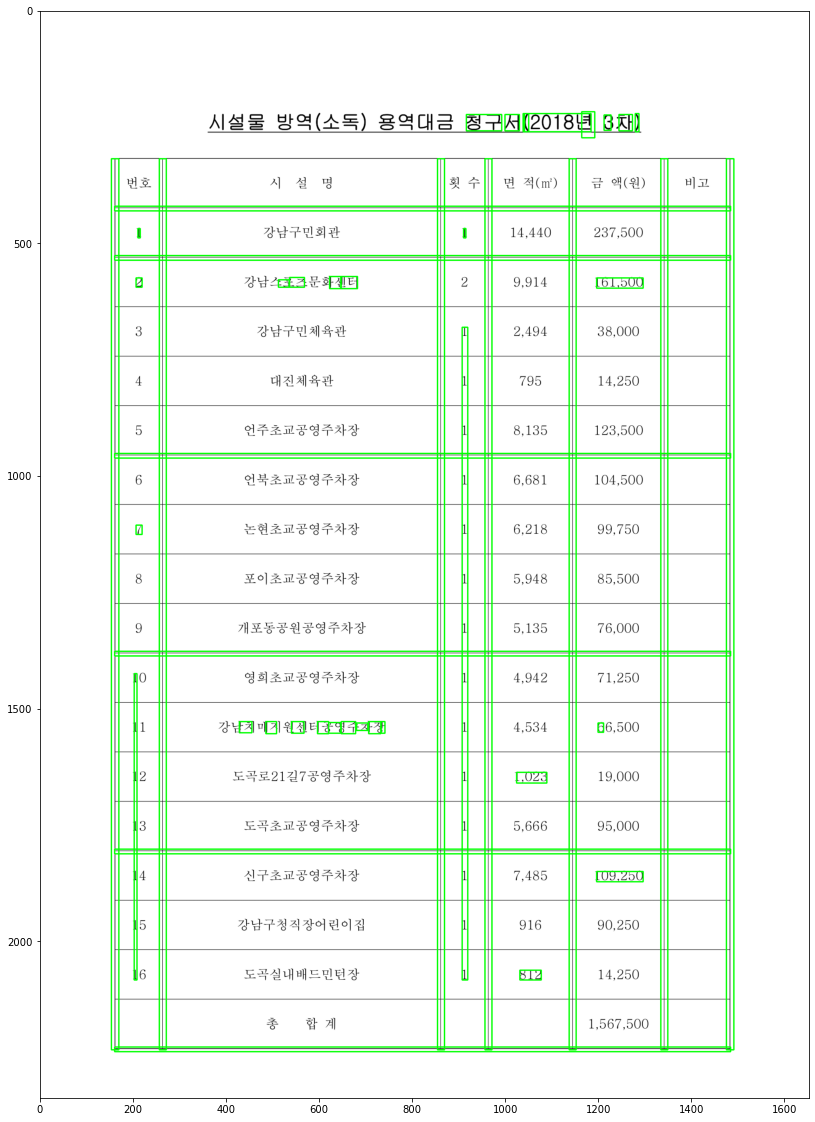

In [ ]:
# PIL로 로드한 경우
# png파일로 로드한 경우
img = cv2.imread('./참조/sample_template-1.png')
# converting to binary img
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray, img_bin = cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
gray = cv2.bitwise_not(img_bin)
kernel = np.ones((2, 1), np.uint8)
img = cv2.erode(gray, kernel, iterations=1)
img = cv2.dilate(img, kernel, iterations=1)
output = pytesseract.image_to_data(img, lang='kor', output_type=Output.DICT)
img = cv2.imread('./참조/sample_template-1.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
df =pd.DataFrame(output)
np.array(df.text)

array(['', '', '', '', '청', '구', '서', '(2018', '년', '3', '차', ')', '', '',
       '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '',
       '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '',
       '', '시', '발', '애', '시', '를', '블', '슬리', '디바', '에', '이', '애', '1]',
       '가', '젤', '이', '7', '80', '', '|', '이라서', '466', '|', '14140',
       '60010]', '', '이', '강', '남', '스', '포', '즈', '문', '회', '센티', '이',
       '9,911', '161,500)', '', '1', '23', '에', '세', '시', '라', '6134',
       '28000', '11', '알', '0101', '', '190', '아', '발이', '101', '비', '반',
       '220', '', '0', '아아아', '아행', '아히', '엠알', '재발', '1', '1628891010',
       '', '이', '아아아', '가이아', '아호', '(80', '104,500)', '', '7', '세이', '탄',
       '에사', '아이와', '아', '어', '알', '불', '(84', '너', '(00409', '', '더',
       '아이', '후', '에', '시', '앵', '아이어', '081', '너', '[대열', '', '1]', '바자',
       '여아', '발', '아아', '블', '발이', '86', '101801079]', '', '[8', '너', '트',
       '발', '게이', '어이', '하', '아어', '발', '시', 

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='conf'>

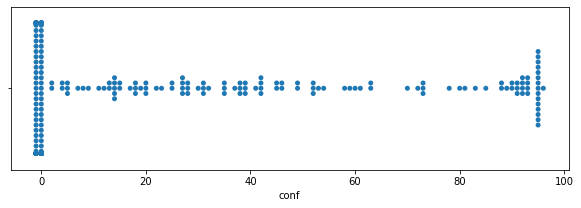

In [ ]:
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.swarmplot(df['conf'])

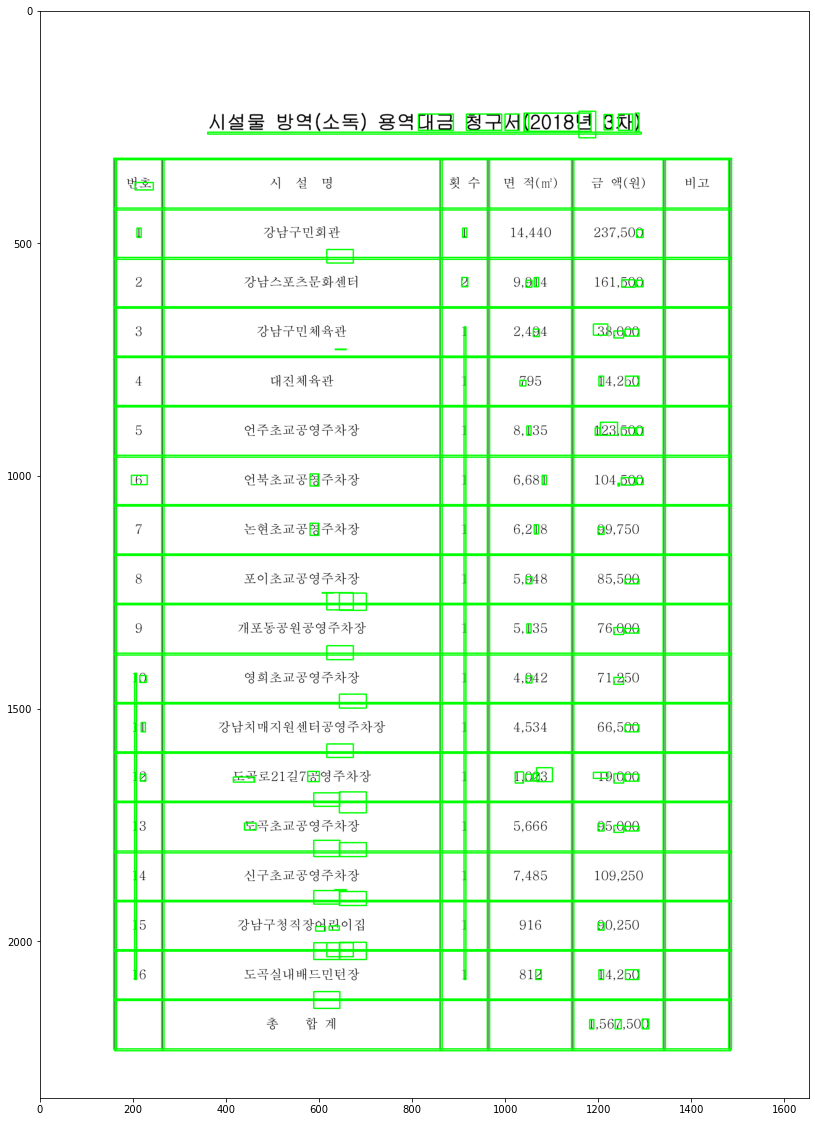

In [ ]:
# PIL로 로드한 경우
# png파일로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/sample_template-1.png'), lang='kor', output_type=Output.DICT)
img = cv2.imread('./참조/sample_template-1.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
df =pd.DataFrame(output)
np.array(df.text)

array(['', '', '', '', '대금', '청', '구', '서', '(2018', '년', '3', '차', ')',
       '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ',
       '', '', '', ' ', '', '', '', ' ', '', '', '', ' ', '', '', '', ' ',
       '', '', '', ' ', '', '', '', '끄', '', '-', '으', '', '}', '으', '으',
       '으', '으', '으', '드', '', '때', '읍', '은', '을', '8', '은', '은', '(8',
       '을', '을', '(8', '을', '을', '을', '8', '(8', '8', '“2', '', '킹', '-',
       '주', '으', '역', '은', ';', '드', '2', '으', '역', '2', '으', '으', '은',
       '역', '역', '는', '', '능', '2', '59', '~', '26', '큼', '의', '5', '<',
       '-', '@@', '의', '102', '옥', '으', '~', '을', '', '102', '=', '그',
       '50', '_', '의', '는', '으', '~', 'ㄷㄷ', 'ㄷ', 'ㅇㅇ', '_｜', '으', '는',
       '으', '_', '인', '', '_', '', '름', '으', '-', 'ㅠ', '>', '>', '12',
       '_', '2', '_', 'ㅇ', '12', '의', '해', '09', '<', '6', '', '=', '케',
       '_', '으', '이', '2', '5', '_', '>', '2', '햇', '02', '이', '<', '2',
       '으', '의', '', '{', '너', '렬', '.', '으', '해', '의

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='conf'>

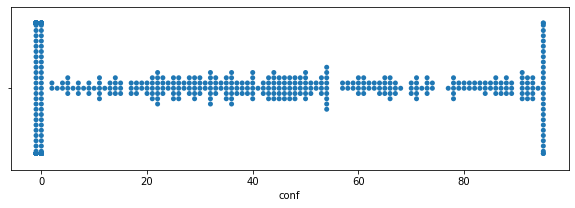

In [ ]:
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.swarmplot(df['conf'])

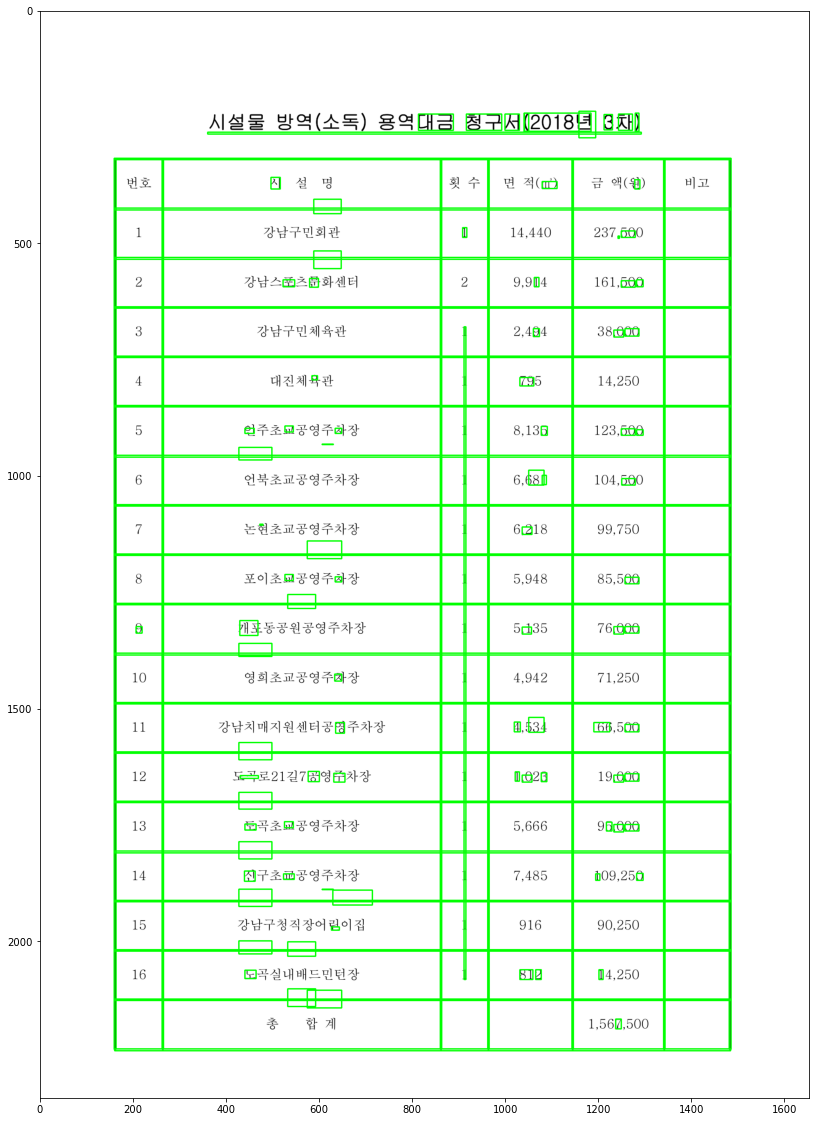

In [ ]:
# PIL로 로드한 경우
# jpg파일로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/sample_template-1.jpg'), lang='kor', output_type=Output.DICT)
img = cv2.imread('./참조/sample_template-1.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='conf'>

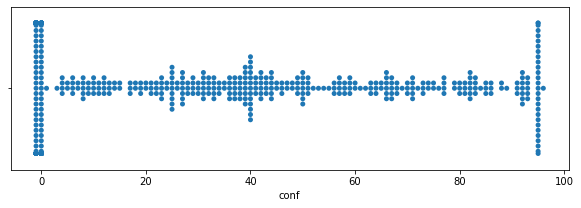

In [ ]:
df =pd.DataFrame(output)
np.array(df.text)
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.swarmplot(df['conf'])

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='conf'>

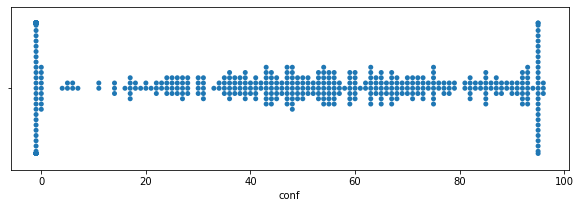

In [ ]:
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.swarmplot(df['conf'])

확실히 jpg 타입일 경우 성능이 개선된다.
지금 이 이미지 해상도는 몇 dpi인가? 
- jpg : 72 dpi
해상도를 좀 더 올린뒤에 성능은 어떤가?

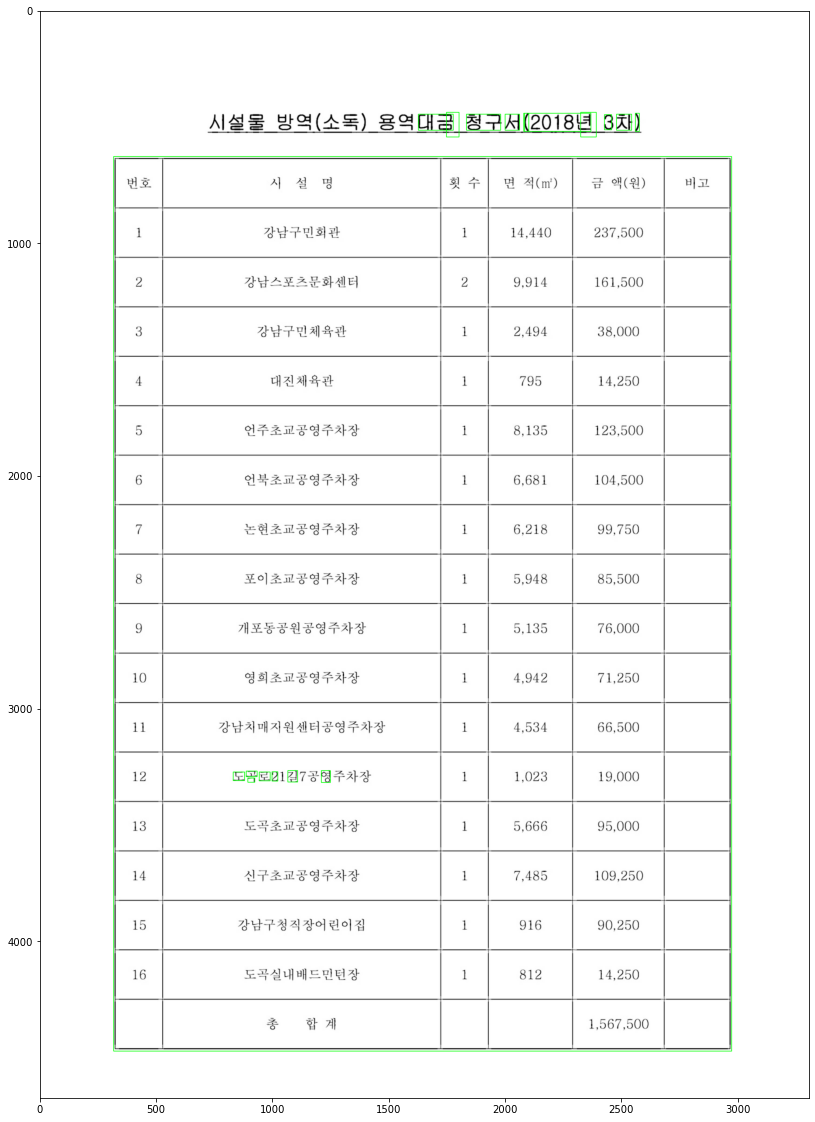

In [ ]:
## https://waifu2x.pro 에서 해상도를 높인 경우
# PIL로 로드한 경우
# jpg파일로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/high_resolution.jpg'), lang='kor+eng', output_type=Output.DICT)
img = cv2.imread('./참조/high_resolution.jpg')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
df =pd.DataFrame(output)
np.array(df.text)

array(['', '', '', '', '대', '금', '청', '구', '서', '(2018', '년', '3', '차',
       ')', '', '', '', 'Go', '', 'Ho', '', '~', '', '‘NU', '', 'mH', '',
       'N', '', 'ny', '', '', '', 'at', '', '~T', '', '', '', '도', '', '',
       '', ''], dtype=object)

/Users/heeran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='conf'>

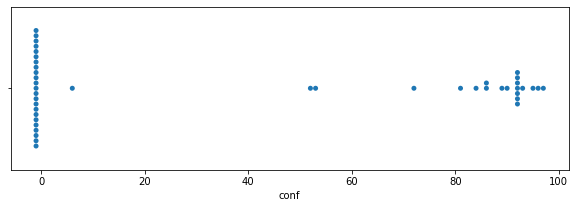

In [ ]:
# confidence score를 0이상으로 했을때의 confidence score 분포
df['conf'] = df['conf'].astype(int)
plt.figure(figsize=(10,3))
sns.swarmplot(df['conf'])

<img width=20% src='./참조/font_type_2.png'>

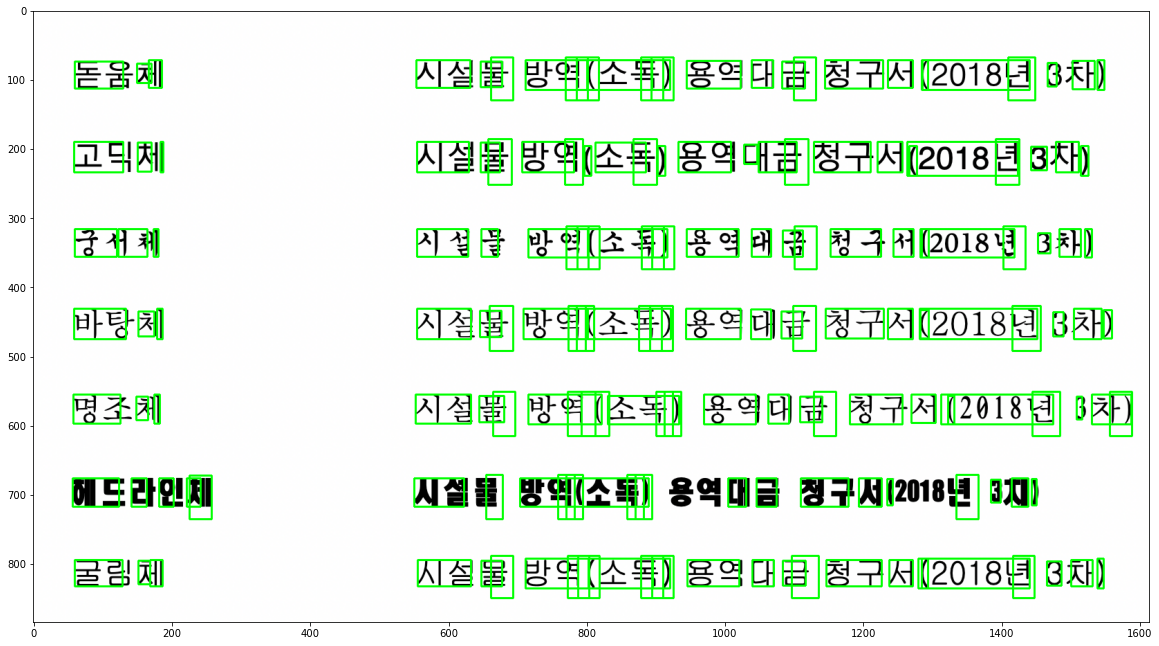

In [ ]:
## https://waifu2x.pro 에서 해상도를 높인 경우
# PIL로 로드한 경우
# jpg파일로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/font_type_2.png'), lang='kor+eng', output_type=Output.DICT)
img = cv2.imread('./참조/font_type_2.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
out_below = pytesseract.image_to_string(Image.open('./참조/font_type_2.png'), lang='kor+eng')
print(out_below)

돋 움 체 시 설 물 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )

고 딕 체 시 설 물 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )
긍 서 체 시 설 글 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )
바 탕 체 시 설 물 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )
명 조 체 시 설 물 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )
에 드 라 인 체 시 셜 물 방 역 ( 소 톡 ) 응 역 대 급 청 구 서 (2018 년 3 자 )

굴 림 체 시 설 물 방 역 ( 소 독 ) 용 역 대 금 청 구 서 (2018 년 3 차 )



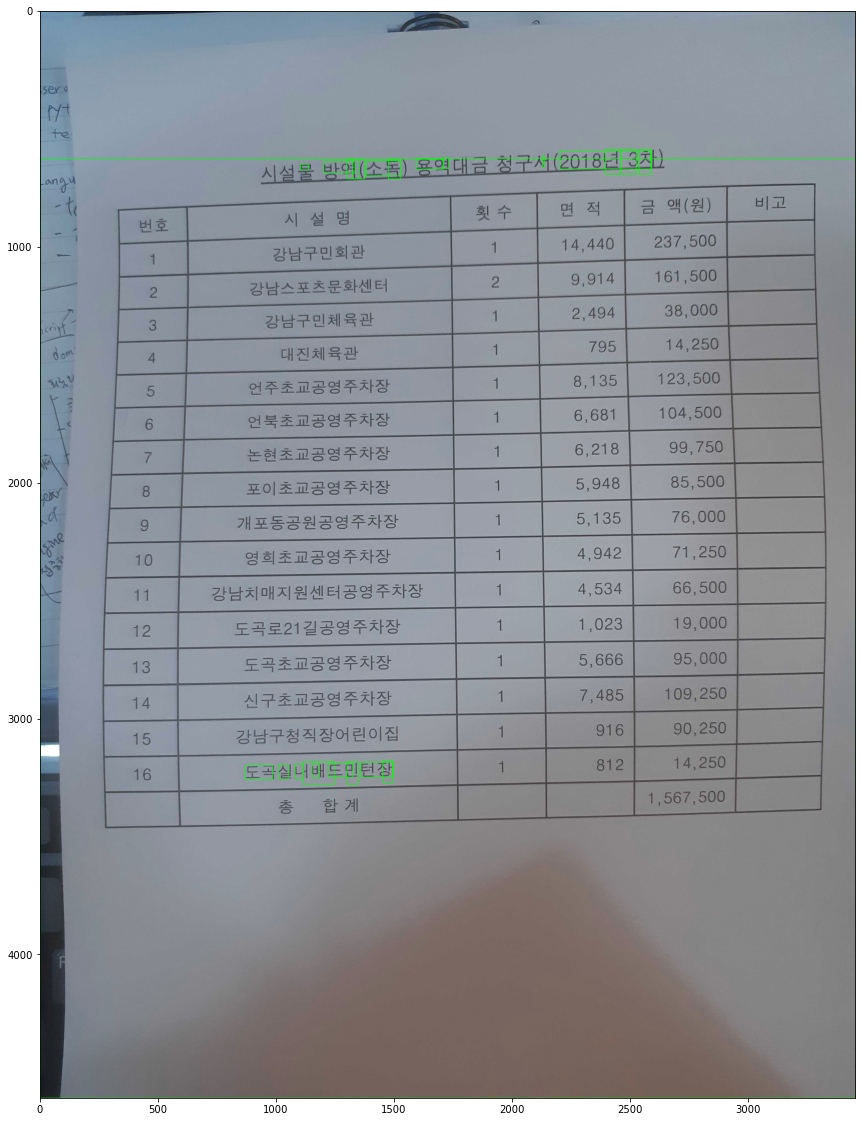

In [ ]:
# phone_pictured.jpg
# PIL로 로드한 경우
# jpg파일로 로드한 경우
output = pytesseract.image_to_data(Image.open('./참조/phone_pictured.jpg'), lang='kor', output_type=Output.DICT)
img = cv2.imread('./참조/phone_pictured.jpg')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()
# cv2.waitKey(0)

In [ ]:
out_below = pytesseract.image_to_string(Image.open('./참조/phone_pictured.jpg'), lang='kor')
print(out_below)

서(2018년 3즈

재

고

씨석묵 박역(소독 요역

턴장

도곡실내배드민

 



In [ ]:
import time


In [ ]:
# Screenshot이라서 전반적인 화질은 좋은데, 표에 들어간 글이 있을때 인식율은?
# PIL로 로드한 경우
# jpg파일로 로드한 경우
start_time = time.time()
output = pytesseract.image_to_data(Image.open('./참조/Screenshot.png'),\
    lang='kor', output_type=Output.DICT) # korean only
print('Fit time : ', time.time() - start_time)


img = cv2.imread('./참조/Screenshot.png')

n_boxes = len(output['text'])
for i in range(n_boxes):
    if int(output['conf'][i]) > 60:
        (x, y, w, h) = (output['left'][i], output['top'][i], output['width'][i], output['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

Fit time :  6.4839928150177


In [ ]:
out_below = pytesseract.image_to_string(Image.open('./참조/Screenshot.png'), lang='kor')
print(out_below)

) 용 역 대 금 청 구 서 (2018 년 3 차 )

 

비 고

 

 

 

 

 

 

 

 

 

 

으 으 으 으 으 으 으 으 으 으 으 으 으 으 으 으 으
바 으 으 으 “2 으 으 “2 으 으 “2 으 으 으 “2 “2 “2 으
쁘 | 므 [ 르 ] 으 | 여 | 은 1 이1 트 ] 은 ] 으 | 여 |[ 므 ] 으 | 으 | 여 | 여 | 의 | 므
액 드 느 으 하 2 학 으 “2 “ ㅡ “ 으 “2 으 으 하 느
70 므

으 하 학 “2 2 느 _ 애 2 띠 핫 2 “ “2 ㅇ 띠
히 학 프 으 으 으 으 호 학 2 학 2 띠 “ 오 프 느
띠 | 하 1이 호 18181 1 여 1 이1 으 1 이 101 으 1 의 | | |
후 흐 | 의 | 여 ㅇ 0 ㅇ |@|@|0|0| ㅠ | | ㅠ -|0|
피 | ㅠ
셰 14

“
5 “ | 5 ㅡ
프 | | | 뽀 | 추 | 차 | 초 [운 로 | 노 |[ 루 | 하 | 차 등제

키 | 조 | 벗 | , 11 | | 11 109011 | | 우 | 퍼
30| 습 | 버 | 애 | |[ 바 |[ 바 |[ 바 |] 바 | 으 | 바 1001 | 바 | 1 리 | *
미 | 1 눌 0 | 0 | 0 1 80 1 0090 | 0 1 | 0090 | 고 | 오 1 6

회 | 매 |※ | 에] 80] 80] 80] 80 ] 80 ] 00 ] 기 | 0 ] 90 | 80 | 옮 비 | 꼽
젠 | 구 | 비 ] 러 119 190189001090 11 91 ] 있 | 9191 호 호
8389 6969986886 바

고 ] 지 | 포 | 2 보 써 0먼 | 뜨 해 구 세

크 | 00 ] 패 | 쁘 161 애 [ 끼 흐 | 읍 | 제 12 1 흡미
ㅠ | ] 1 태 | 굴 | 89 ] * 버 | 고 | 고 | 버
ㅎ 곱 | 먼 0
ㅠ 0
」^:_ -| 여 | 이 | ㅠ |01|00|6|060| 으 | 은 | 는 | 인 | 은| 큰 | 몬 | 온

괴

 

 

 

 

 

 

 

 


Tesseract의 Table Extraction율이 심각하다

In [ ]:
# 참조 : https://levelup.gitconnected.com/text-extraction-from-a-table-image-using-pytesseract-and-opencv-3342870691ae
# Table Extraction 성능 올리기



<img width=20% src='./참조/Screenshot.png'>

# tessdata_best 모델이 성능이 더 낫긴하지만 여전히 table extraction을 잘 못한다.

<img src='./참조/tesseract_w_GPU.png'>